WARNING Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
['bench_and_person.jpg', 'bike.jpg', 'books.jpg', 'person_holding_umbrella.jpg']
Loading yolo11n_ncnn_model for NCNN inference...

image 1/1 c:\Users\DELL\Desktop\MyEnvironment\navsight-ai\src\data\bench_and_person.jpg: 640x640 1 person, 1 bench, 266.1ms
Speed: 19.6ms preprocess, 266.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
1: Microsoft Zira Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
Text spoken aloud.

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
1: 

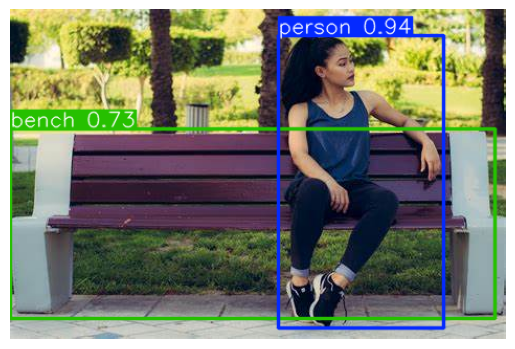


image 1/1 c:\Users\DELL\Desktop\MyEnvironment\navsight-ai\src\data\bike.jpg: 640x640 1 bicycle, 212.5ms
Speed: 94.2ms preprocess, 212.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
1: Microsoft Zira Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
Text spoken aloud.

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
1: Microsoft Zira Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
Text spoken aloud.


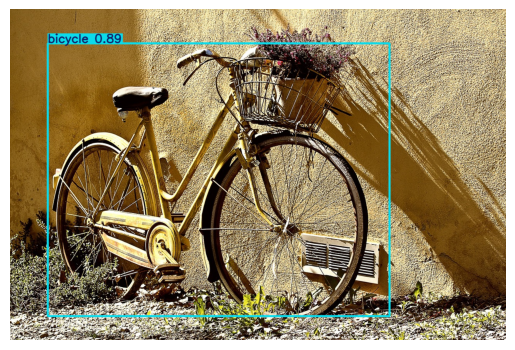


image 1/1 c:\Users\DELL\Desktop\MyEnvironment\navsight-ai\src\data\books.jpg: 640x640 7 books, 391.2ms
Speed: 13.2ms preprocess, 391.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
1: Microsoft Zira Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
Text spoken aloud.

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
1: Microsoft Zira Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
Text spoken aloud.


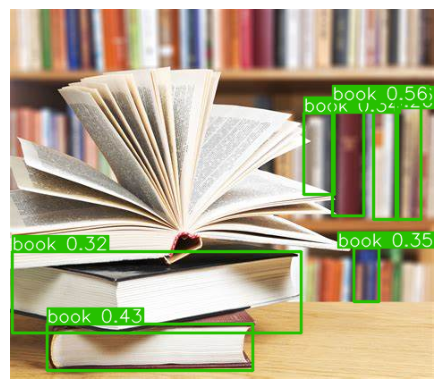


image 1/1 c:\Users\DELL\Desktop\MyEnvironment\navsight-ai\src\data\person_holding_umbrella.jpg: 640x640 2 persons, 1 umbrella, 269.9ms
Speed: 25.3ms preprocess, 269.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
1: Microsoft Zira Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
Text spoken aloud.

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
1: Microsoft Zira Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
Text spoken aloud.

Available voices:

0: Microsoft David Desktop - English (United States) - HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_M

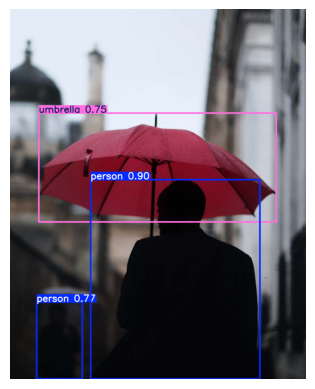

In [38]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from tts.tts import text_to_speech
import os
# # Load a YOLO11n PyTorch model
# model = YOLO("yolo11n.pt")

# # Export the model to NCNN format
# model.export(format="ncnn")  # creates 'yolo11n_ncnn_model'

# Load the exported NCNN model
ncnn_model = YOLO("yolo11n_ncnn_model")

image_formats = ['.jpg', '.jpeg', '.png']

# Get all image files in the current directory
image_files = [f for f in os.listdir('data') if os.path.splitext(f)[1].lower() in image_formats]
print(image_files)
for i, image in enumerate(image_files, start=1):
    results = ncnn_model(f'data/{image}')

    # Get detected object names
    detected_names = set()
    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        name = results[0].names[cls_id]
        detected_names.add(name)

    # Text to speech
    text_to_speech(f'image {i}')
    for name in detected_names:
        text_to_speech(f"Detected: {name}")

    # Plot and show the annotated image
    annotated_img = results[0].plot()
    plt.imshow(annotated_img[:, :, ::-1])  # Convert BGR to RGB for display
    plt.axis('off')
    plt.show()


In [10]:
ncnn_model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou